
<span style="color:cyan; font-size:3em; font-family:Papyrus"> 
<div align="center"><b>Pregunta 2</b></div>
</span> 

## Cargar Datos

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
import feather

In [2]:
df = pd.read_feather('./data/DatosViernesNegro.feather')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [3]:
df.nunique()

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               20
Product_Category_2               17
Product_Category_3               15
Purchase                      18105
dtype: int64

In [4]:
df.isna().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

## 1. Muestre en un diagrama de barras como se distribuye el numero de elementos de la variable Gender.

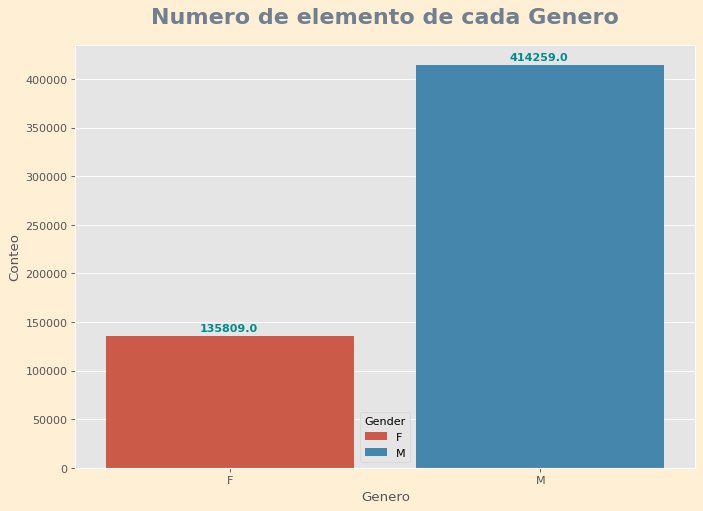

In [5]:
fig = plt.figure(figsize=(10,7), facecolor = 'papayawhip', edgecolor = '#FDEDEC', dpi=80)
plt.style.use('ggplot')
ax = sns.countplot(x = 'Gender', data=df, hue='Gender', dodge=False)
plt.title('Numero de elemento de cada Genero', fontsize=20, color="slategrey", 
fontweight="bold", y=1.05, x=0.5, horizontalalignment="center", verticalalignment="center")
plt.xlabel('Genero')
plt.ylabel('Conteo')
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+5000),  
   rotation=0, color='darkcyan', fontweight='bold')
plt.show()

## 2. Considere la siguiente codificación para la variable Age

<center>

|Age |Age_Cod|
| :---        |    ---:   |
|0-17 |Stage1|
|18-25 |Stage2|
|26-35 |Stage3|
|36-45 |Stage4|
|46-50 |Stage5|
|51-55 |Stage6|
|55+ |Stage7|

</center>


Muestre en un diagrama de barras como se distribuye el numero de elementos de la variable Age_Cod






In [6]:
df.sample(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
93167,1002304,P00298042,M,46-50,12,B,2,1,5,12.0,14.0,6937
147790,1004796,P00350142,M,36-45,7,A,4+,1,8,17.0,NaN,7844
374595,1003681,P00028842,M,26-35,7,B,3,0,6,8.0,NaN,20487
517173,1001647,P00187842,M,18-25,18,B,0,0,1,16.0,NaN,15630
524452,1002835,P00233542,M,36-45,20,B,2,0,1,15.0,NaN,11810


In [7]:
df['Age'] = df['Age'].astype('category')
df['Age_cod'] = df['Age']
df['Age_cod'] = df['Age_cod'].map({
        '0-17':'Stage 1', '18-25':'Stage 2', '26-35':'Stage 3', 
        '36-45':'Stage 4', '46-50':'Stage 5', '51-55':'Stage 6', 
        '55+':'Stage 7'
    })
pd.crosstab(index=df['Age_cod'], columns='count')

col_0,count
Age_cod,
Stage 1,15102
Stage 2,99660
Stage 3,219587
Stage 4,110013
Stage 5,45701
Stage 6,38501
Stage 7,21504


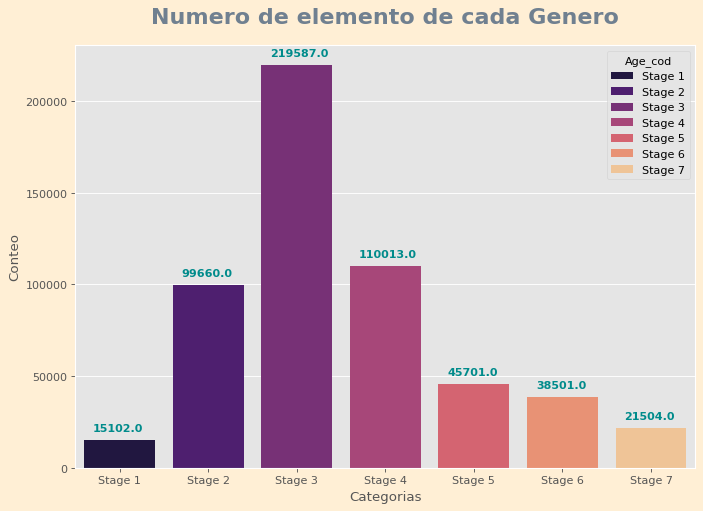

In [8]:
fig = plt.figure(figsize=(10,7), facecolor = 'papayawhip', edgecolor = '#FDEDEC', dpi=80)
plt.style.use('ggplot')
ax = sns.countplot(x='Age_cod', data=df, hue='Age_cod', dodge=False, palette='magma')
plt.title('Numero de elemento de cada Genero', fontsize=20, color="slategrey", 
fontweight="bold", y=1.05, x=0.5, horizontalalignment="center", verticalalignment="center")
plt.xlabel('Categorias')
plt.ylabel('Conteo')
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+5000),  
   rotation=0, color='darkcyan', fontweight='bold')
plt.show()

## 3. Elimine las variables con mas de 2022 valores faltantes.

In [9]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
Age_cod                            0
dtype: int64

In [10]:
# Porcentaje de valores faltantes
round(df.isnull().sum()/df.shape[0]*100,2)

User_ID                        0.00
Product_ID                     0.00
Gender                         0.00
Age                            0.00
Occupation                     0.00
City_Category                  0.00
Stay_In_Current_City_Years     0.00
Marital_Status                 0.00
Product_Category_1             0.00
Product_Category_2            31.57
Product_Category_3            69.67
Purchase                       0.00
Age_cod                        0.00
dtype: float64

In [11]:
df.drop(['Product_Category_2','Product_Category_3'], axis=1, inplace=True)
df.sample(3)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase,Age_cod
271678,1005858,P00112142,M,26-35,4,B,1,0,1,19047,Stage 3
421487,1004843,P00189642,M,55+,1,C,2,0,8,8006,Stage 7
536204,1004510,P00046642,M,46-50,7,A,4+,1,1,11936,Stage 5


## 4.Elimine las variables User_ID y Product_ID

In [12]:
df.drop(['User_ID','Product_ID'], axis=1, inplace=True)
df.sample(3)

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase,Age_cod
357900,M,26-35,20,B,3,1,8,7848,Stage 3
88828,M,26-35,20,A,3,1,4,709,Stage 3
376099,M,26-35,0,C,3,0,16,8824,Stage 3


## 5. Muestre un histograma de la variable Purchase separando los datos por sexo (Variable Gender) 

In [13]:
df.columns

Index(['Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Purchase', 'Age_cod'],
      dtype='object')

In [14]:
# fig = plt.figure(figsize=(10,7), facecolor = 'papayawhip', edgecolor = '#FDEDEC', dpi=80)
# plt.style.use('ggplot')
# ax = sns.countplot(x='Age_cod', data=df_mapped, hue='Age_cod', dodge=False, palette='magma')
# plt.title('Numero de elemento de cada Genero', fontsize=20, color="slategrey", 
# fontweight="bold", y=1.05, x=0.5, horizontalalignment="center", verticalalignment="center")
# plt.xlabel('Categorias')
# plt.ylabel('Conteo')
# plt.show()

<AxesSubplot:xlabel='Purchase', ylabel='Count'>

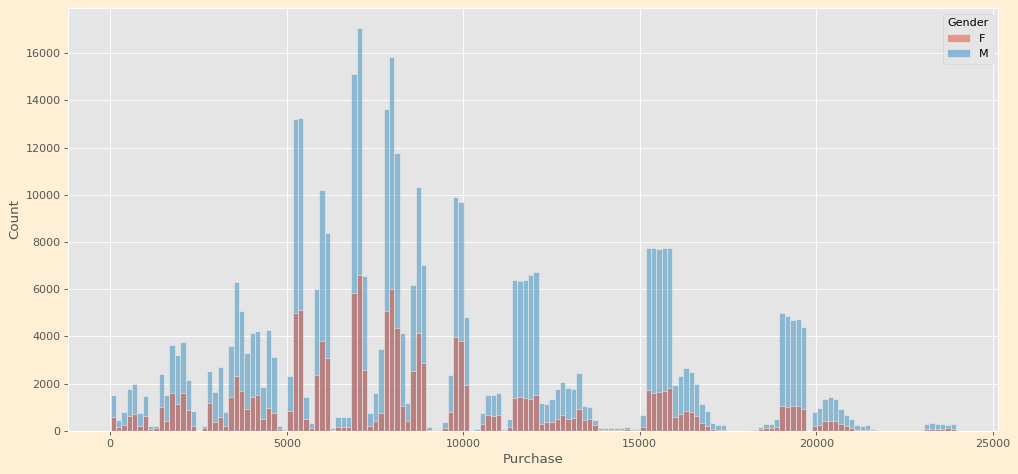

In [20]:
fig = plt.figure(figsize=(15,7), facecolor = 'papayawhip', edgecolor = '#FDEDEC', dpi=80)
plt.style.use('ggplot')
sns.histplot(x='Purchase', data=df, hue='Gender')
# plt.title('Numero de elemento de cada Genero', fontsize=20, color="slategrey", 
# fontweight="bold", y=1.05, x=0.5, horizontalalignment="center", verticalalignment="center")
# plt.xlabel('Categorias')
# plt.ylabel('Conteo')
# plt.show()

## 6. Muestre un histograma de la variable Purchase separando los datos por la variable Age_Cod

<AxesSubplot:xlabel='Purchase', ylabel='Count'>

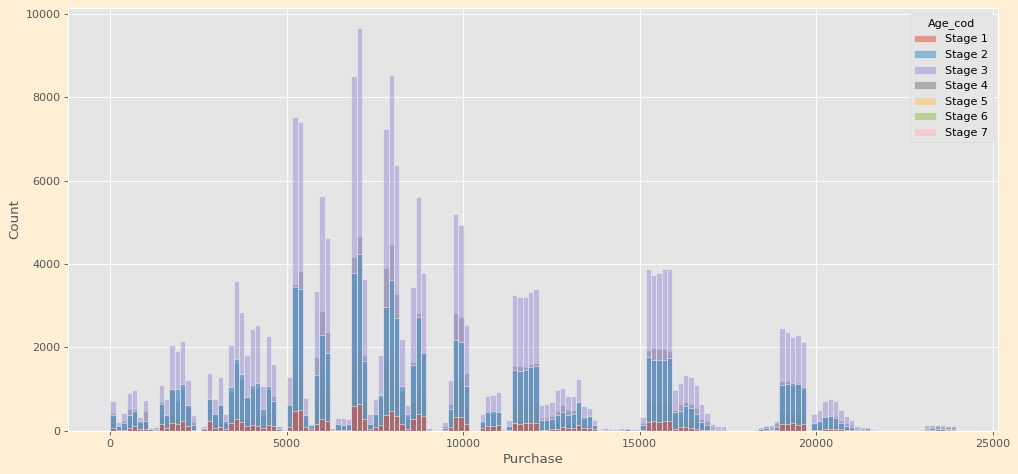

In [22]:
fig = plt.figure(figsize=(15,7), facecolor = 'papayawhip', edgecolor = '#FDEDEC', dpi=80)
plt.style.use('ggplot')
sns.histplot(x='Purchase', data=df, hue='Age_cod')
# plt.title('Numero de elemento de cada Genero', fontsize=20, color="slategrey", 
# fontweight="bold", y=1.05, x=0.5, horizontalalignment="center", verticalalignment="center")
# plt.xlabel('Categorias')
# plt.ylabel('Conteo')
# plt.show()

## 7. Cree un modelo de clasificacion (diferente a una regresión logistica) considerando que la variable de interés 
es el Sexo (Variable : Gender).

## 8. Cree un RandomForestRegressor  (haciendo un proceso de GridSearchCV) considerando como variable 
dependiente a Purchase.

## 9. Cree un dataset de nombre VN_Cities_A_C donde solo se considere las ciudades A y C (Variable 
City_Category). Para este nuevo dataset cree un modelo de regresión logística (haciendo un proceso de 
GridSearchCV) considerando a la variable City_Category como la variable de interes.


## 10. Implemente una red neuronal de clasificacion para pronosticar la variable Gender. Realice los cinco primeros 
pasos descritos en la sesion 12. Es decir : 
1. 1er Paso : Cargar datos 
2. 2do Paso : Definir un modelo en keras
3. 3er Paso : "Compilamos" el modelo del paso 2
4. 4to Paso : Ajustar el modelo a nuestro conjunto de datos (proviene del paso 1)
5. 5to Paso : Evaluación del modelo